# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 2do parcial, 2020</center>           

La duración del parcial es de 3 horas. El parcial consta de 3 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al ejercicio 3. Hay un notebook por ejercicio planteado.

* [Ejercicio 3 - SVM](#Ejercicio1) (30 puntos)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import pickle
import itertools

from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Ejercicio 3

En este ejercicio se aplican Máquinas de Vectores de Sporte (SVM, Support Vector Machines) a diferentes conjuntos de datos.

### Ejercicio 3 - parte a)  

Considere el siguiente conjunto de datos sintético y las tres fronteras de decisión representadas correspondientes a discriminantes lineales.

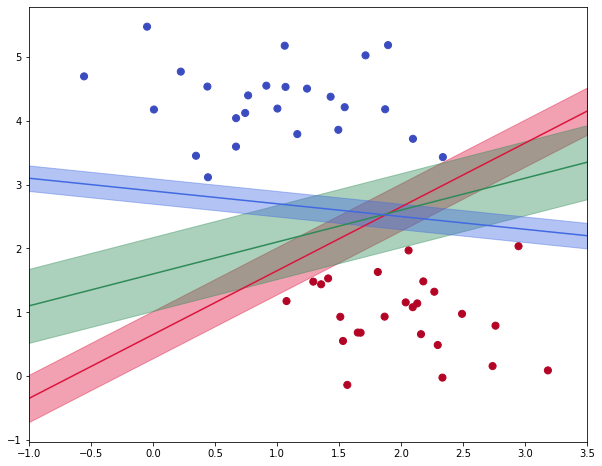

In [2]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')

colors = ['crimson', 'seagreen', 'royalblue']
ind = 0

for m, b, d in [(1, 0.65, 0.37), (0.5, 1.6, 0.58), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-', color=colors[ind])
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color=colors[ind], alpha=0.4)
    ind+=1

plt.xlim(-1, 3.5);

Indique cuál de las fronteras de decisión considera más adecuada y justifique su respuesta. 

Para ello explique en qué consiste el margen y por qué maximizarlo es ventajoso.

**Respuesta:**

La frontera verde es la mejor, dado que tiene el margen más grande. El margen es la distancia que tienen los dos datos mas cercanos a la frontera. Mientras mayor este margen, menor es la dimensión VC "efectiva", por lo que nuestro modelo generalizará mejor y se sobreajustará menos a los datos.


### Ejercicio 3 - parte b)  

Complete la siguiente función para ajustar un modelo de SVM (con kernel `linear` por defecto) y parámetro de regularización `C` (con valor `C=1E10` por defecto) y devolver los vectores de soporte.

**NOTA:** Preste atención a usar los valores de los parámetros `kernel` y `C` que se pasan a la función `svm_linear`.

In [3]:
def svm_model(X, y, kernel='linear', C=1E10):
    """Se ajusta un modelo SVM con kernel lineal a los datos y C=1E10"""
    
    ##########################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
    ###########################################################################################

    clf_svm = svm.SVC(kernel=kernel, C=C)
    clf_svm.fit(X,y)
    
    vectores_soporte = clf_svm.support_vectors_

    
    ###########################################################################################
    ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
    ###########################################################################################
    
    return clf_svm, vectores_soporte

In [4]:
def plot_svc_decision_function(model, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
            
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

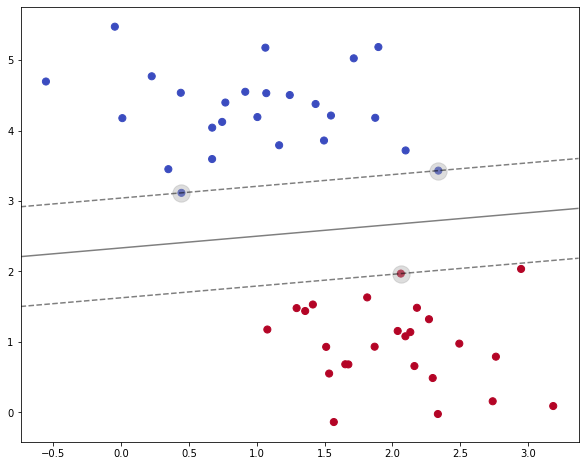

In [5]:
clf_svm, vectores_soporte = svm_model(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(clf_svm);
plt.scatter(vectores_soporte[:, 0], vectores_soporte[:, 1],
            s=300, linewidth=1, color='#AAAAAA', alpha=0.4);

### Ejercicio 3 - parte c)  

Ejecute el siguiente código y compare las soluciones obtenidas para 60 y 120 puntos. Explique a qué se debe el comportamiento observado.

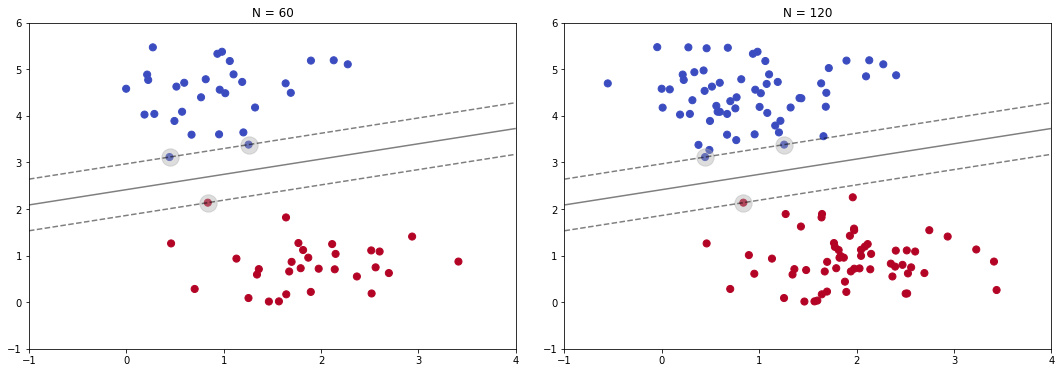

In [6]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    
    clf_svm, vectores_soporte = svm_model(X, y)
        
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(clf_svm, ax)
    ax.scatter(vectores_soporte[:, 0], vectores_soporte[:, 1],
                s=300, linewidth=1, color='#AAAAAA', alpha=0.4);

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Respuesta:**

El resultado del entrenamiento es la misma frontera de decision. En svm, los vectores de soporte son los únicos que impactan la frontera, y en este caso, los conjunto de datos tienen los mismos vectores de soporte. Por lo tanto, el resultado del entrenamiento es el mismo, sin importar el tamaño de muestra.



### Ejercicio 3 - parte d)  

Ejecute el siguiente código y compare las soluciones obtenidas para `C=10` y `C=0.1`. Explique a qué se debe el comportamiento observado.

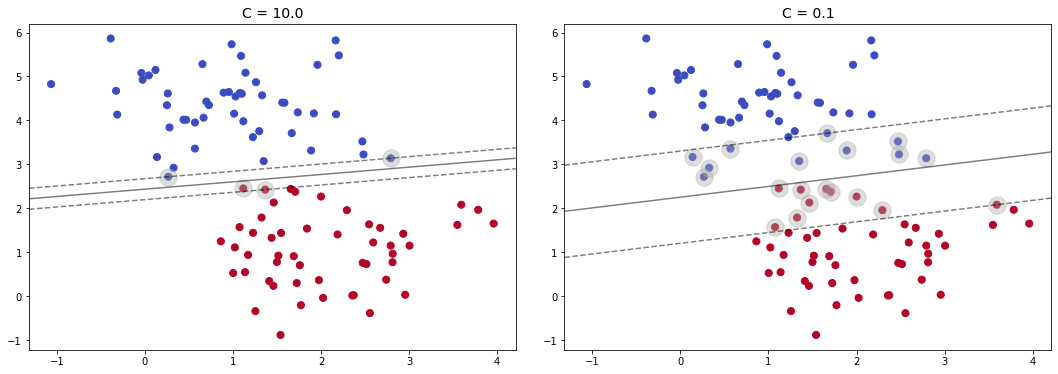

In [7]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    clf_svm, vectores_soporte = svm_model(X, y, C=C)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
    plot_svc_decision_function(clf_svm, axi)
    axi.scatter(vectores_soporte[:, 0], vectores_soporte[:, 1],
                s=300, linewidth=1, color='#AAAAAA', alpha=0.4);
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**Respuesta:**

C es un hiperparámetro que indica que tanto se penaliza las violaciones del margen. Una violación del margen son los vectores de soporte que están dentro del margen. Mientras mayor C, más se penalizan, ver que con C=10 hay una sola y con C=0.01 hay muchas.

Permitir violaciones tiene sentido cuando se tienen datos no linealmente separables, o cuando queremos agrandar un poco el margen para tener una mejor generalizacion (caso de la izquierda).


### Ejercicio 3 - parte e)  

Ejecute el siguiente código y compare las soluciones obtenidas para kernel `linear` y `rbf`. Explique a qué se debe el comportamiento observado.

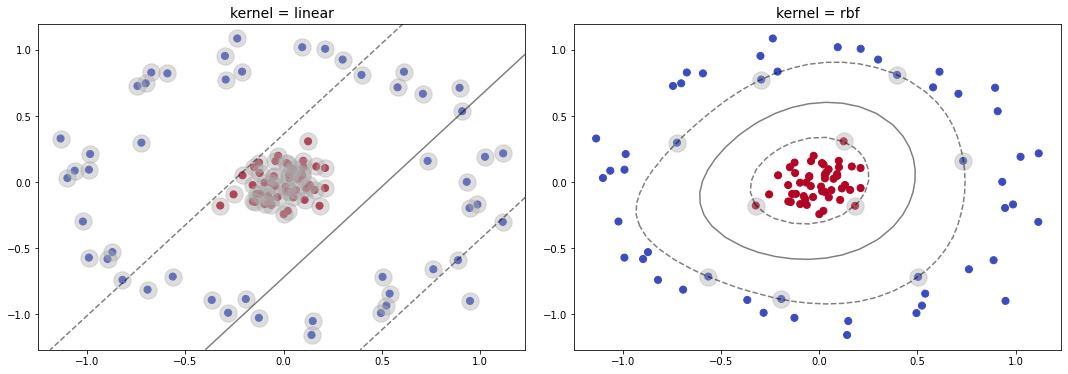

In [8]:
X, y = make_circles(100, factor=.1, noise=.1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, kern in zip(ax, ['linear', 'rbf']):
    clf_svm, vectores_soporte = svm_model(X, y, kernel=kern, C=1E6)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
    plot_svc_decision_function(clf_svm, axi)
    axi.scatter(vectores_soporte[:, 0], vectores_soporte[:, 1],
                s=300, linewidth=1, color='#AAAAAA', alpha=0.4);
    axi.set_title('kernel = {}'.format(kern), size=14)

**Respuesta:**

Los datos en este caso no son linealmente separables en el espacio original, por lo que no tiene sentido usar un kernel lineal. Usarlo resulta en un clasificador poco útil, como se ve en la imagen a la izquierda.

Para llevar los datos a un espacio que sean los linealmente separables se hace una transformación. En el caso del rbf, se hace una transformación a un espacio de dimensión infinita, haciendo uso del truco del kernel para hacerla realizable. El resultado es una frontera de decisión que clasifica bien los datos, como se ve en la imagen a la derecha. 

El problema del rbf es que es sobreajustarse a los datos, por lo que hay que controlar bien los hiperparámetros, en particular el gamma ($\gamma$)

### Ejercicio 3 - parte f)  

A continuación abordaremos el problema de reconocimiento facial a partir de imágenes usando el conjunto de datos denominado [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/). Consideraremos un subconjunto que contiene solo a las 8 personas que tienen al menos 60 imágenes en el conjunto de datos. 

A continuación se cargan los datos, se muestran los nombres de las personas, las dimensiones de las imágenes y algunos ejemplos.

In [9]:
faces = pickle.load(open("faces.pkl", "rb"))
N, a, b = faces.images.shape
print('Cantidad de imágenes: {0:d}'.format(N))
print('Resolución de las imágenes: {:d}x{:d}'.format(a, b))
print(faces.target_names)
print(faces.images[1].shape)

Cantidad de imágenes: 1348
Resolución de las imágenes: 62x47
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(62, 47)


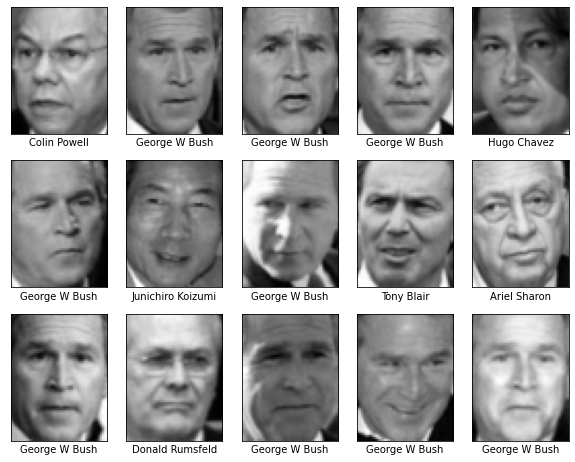

In [10]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i,:,::-1], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Complete el siguiente código para dividir los datos en un conjunto de entrenamiento y otro de test usando la función `train_test_split` de sklearn. La cantidad de datos del conjunto de test debe ser **1/4** del total.

**IMPORTANTE:** Preste atención a usar el parámetro `random_state` tal como está definido en la siguiente celda.

In [11]:
random_state = 42

X = faces.data
y = faces.target

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, 
                                                    random_state=random_state)


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

### Ejercicio 3 - parte g)  

Cada imagen tiene casi 3000 puntos (62 × 47). Si bien se podrían usar estos puntos como características de entrada, a menudo es más efectivo usar algún tipo de preprocesado para extraer características más significativas. En este caso usaremos un **análisis de componentes principales (PCA)** para extraer 150 componentes y con ellos alimentar a un clasificador de máquina de vectores de soporte.

Estudie las funciones `fit` y `transform` de `PCA` y explique en sus palabras qué es lo que hace un análisis de componentes principales (PCA) y de qué se encargan cada una de esas funciones.

**Respuesta:**

El PCA utiliza la descomposicion en valores singulares de los datos para proyectarlo a un espacio de menor dimensión. En español, se evalua que características realmente tiene un impacto sobre el modelo y se descartan aquellas que no aportan, disminuyendo la dimension.


### Ejercicio 3 - parte h)  

Complete el código a continuación para extraer los primeros 150 componentes principales del conjunto de entrenamiento y del conjunto de test.

**IMPORTANTE:** Preste atención a usar el parámetro `whiten` de pre-procesamiento de datos tal como está definido en la siguiente celda.

In [12]:
n_components = 150
whiten = True

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

# instancia de pca
pca = PCA(n_components=n_components, whiten=whiten)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

### Ejercicio 3 - parte i)  

A continuación se implementa una búsqueda de los parámetros óptimos del clasificador usando validación cruzada. Para ello, complete el código usando `GridSearchCV` y ajuste un clasificafor SVM (con `kernel='rbf'`) con los valores óptimos de los parámetros dentro de la grilla definida. 

In [15]:
C_grid = [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
gamma_grid = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

# diccionario con la grilla de parámetros
param_grid = {"C": C_grid, "gamma": gamma_grid}


# SVM
clf_svm = svm.SVC(kernel="rbf")


# instancia de GridSearchCV
grid_CV = GridSearchCV(clf_svm, param_grid, verbose=2)
grid_CV.fit(X_train_pca, y_train)

# mejor modelo ajustado
clf_best = grid_CV.best_estimator_


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

print("Mejor modelo encontrado por búsqueda en la grilla usando CV:")
print(clf_best)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.1s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.1s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.1s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.1s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.1s
[CV] END ................................C=0.1, gamma=0.0005; total time=   0.1s
[CV] END ................................C=0.1, gamma=0.0005; total time=   0.1s
[CV] END ................................C=0.1, gamma=0.0005; total time=   0.1s
[CV] END ................................C=0.1, gamma=0.0005; total time=   0.1s
[CV] END ................................C=0.1, gamma=0.0005; total time=   0.1s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.1s
[CV] END .................................C=0.1

[CV] END ...............................C=100.0, gamma=0.001; total time=   0.1s
[CV] END ...............................C=100.0, gamma=0.001; total time=   0.1s
[CV] END ...............................C=100.0, gamma=0.001; total time=   0.1s
[CV] END ...............................C=100.0, gamma=0.005; total time=   0.2s
[CV] END ...............................C=100.0, gamma=0.005; total time=   0.2s
[CV] END ...............................C=100.0, gamma=0.005; total time=   0.2s
[CV] END ...............................C=100.0, gamma=0.005; total time=   0.2s
[CV] END ...............................C=100.0, gamma=0.005; total time=   0.2s
[CV] END ................................C=100.0, gamma=0.01; total time=   0.2s
[CV] END ................................C=100.0, gamma=0.01; total time=   0.2s
[CV] END ................................C=100.0, gamma=0.01; total time=   0.2s
[CV] END ................................C=100.0, gamma=0.01; total time=   0.2s
[CV] END ...................

### Ejercicio 3 - parte j)  

Usando el mejor modelo obtenido en la parte anterior estime las etiquetas para el conjunto de test y calcule el error de clasificación.

In [16]:
###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

# etiquetas estimadas para el conjunto de test
y_test_est = clf_best.predict(X_test_pca)


# error de test con el mejor modelo
error_test = np.average(y_test_est!=y_test)


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################
print('El mejor modelo obtenido tiene un error de test de: %f' % error_test)

El mejor modelo obtenido tiene un error de test de: 0.157270


A continuación se muestran algunos ejemplos del conjunto de test con su predicción (errores en rojo).

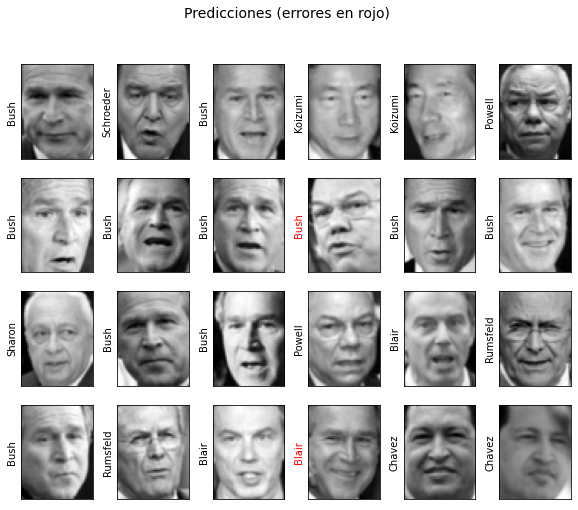

In [17]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_test_est[i]].split()[-1],
                   color='black' if y_test_est[i] == y_test[i] else 'red')
fig.suptitle('Predicciones (errores en rojo)', size=14);

### Ejercicio 3 - parte k)  

Para analizar los resultados con mayor detalle se propone utilizar una matriz de confusión. Para ello, ejecute el siguiente código e inspeccione la matriz de confusión resultante. Explique para qué sirve una matriz de confusión. Comente sobre el tipo de errores que ocurren y las diferencias de desempeño según la persona. Indique a qué pueden deberse las diferencias de desempeño para distintas personas.

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


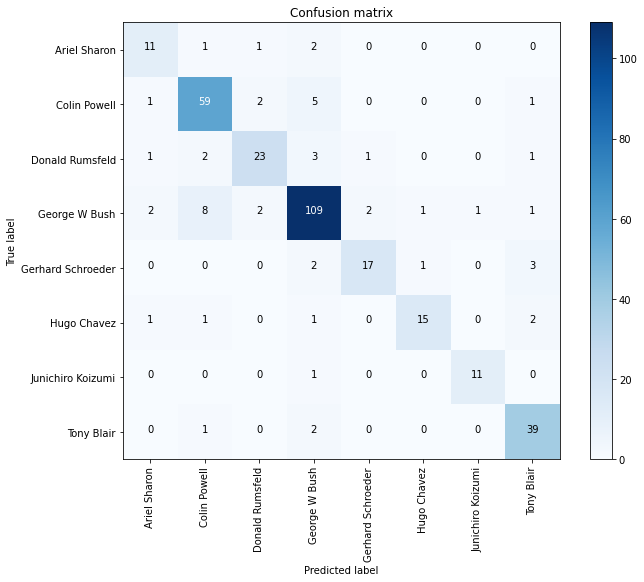

In [19]:
cnf_matrix = confusion_matrix(y_test, y_test_est)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=faces.target_names,
                      title='Confusion matrix')

**Respuesta:**

...
